<a href="https://colab.research.google.com/github/GabrielRaoul/BuML/blob/main/BuML_01_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BuML_01-Introduction

This is a Toy-Example for a regression in Colab.

## General Setup

### Imports

In [ ]:
from google.colab import output
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
import tensorflow as tf

In [ ]:
!rm -rf helper
!rm -rf sample_data
!mkdir helper
!wget https://raw.githubusercontent.com/GabrielRaoul/BuML/refs/heads/main/plots.py
!mv "/content/plots.py" "/content/helper"

!pip install ipython-autotime
output.clear()

In [ ]:
# Import downloaded helper functions
from helper import plots

#### Check Versions

In [ ]:
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"TensorFlow version: {tf.__version__}")
print("")
!/usr/local/cuda/bin/nvcc --version

NumPy version: 2.0.2
pandas version: 2.2.2
TensorFlow version: 2.18.0

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
time: 104 ms (started: 2025-04-01 09:01:50 +00:00)


#### Check for graphics card
if output is
```
/bin/bash: line 1: nvidia-smi: command not found
```
Change runtime under
```
Runtime -> Change runtime type -> T4 GPU (Englisch)
Laufzeit - > Laufzeittyp ändern -> T4 GPU (German)
```





In [ ]:
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found
time: 108 ms (started: 2025-04-01 09:01:51 +00:00)


### Configuration

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.backend.clear_session()

time: 494 ms (started: 2025-04-01 09:01:51 +00:00)


## Data

### Load Data

In [ ]:
X = np.arange(1,400,4,dtype=np.int32)
y = np.asarray(list(map(lambda x: 4*x, X)),dtype=np.int32)

time: 1.03 ms (started: 2025-04-01 09:01:51 +00:00)


### Inspect Data

In [ ]:
print(f"{min(X)=}, {max(X)=}, {len(X)=}")
print(f"{min(y)=}, {max(y)=}, {len(y)=}")

min(X)=np.int32(1), max(X)=np.int32(397), len(X)=100
min(y)=np.int32(4), max(y)=np.int32(1588), len(y)=100
time: 885 µs (started: 2025-04-01 09:01:51 +00:00)


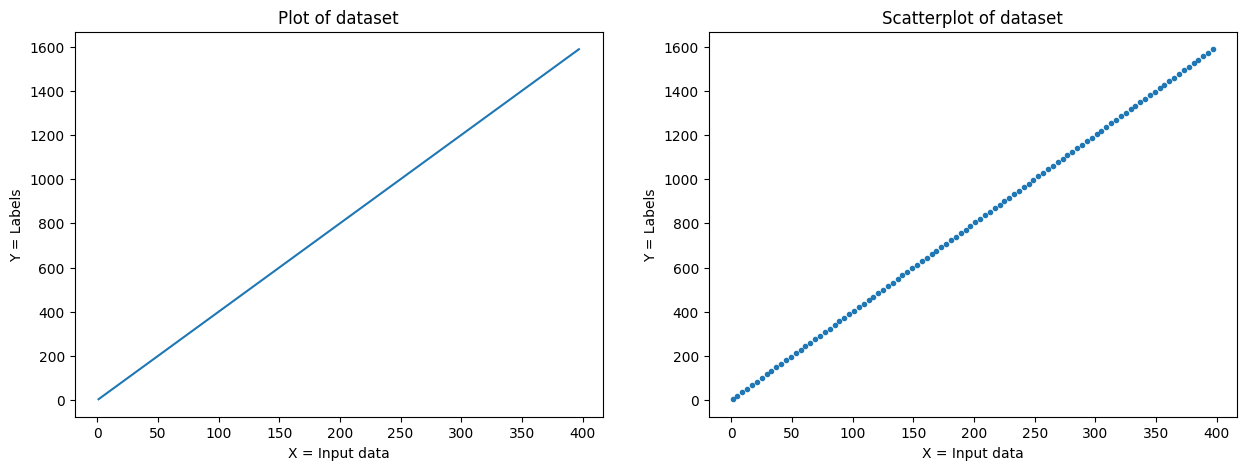

time: 487 ms (started: 2025-04-01 09:01:51 +00:00)


In [ ]:
plots.linear_dataset_plot(X,y)

### Prepare Data

In [ ]:
test_split = .2
test_size = int(len(X)*test_split)
X_train = X[:-test_size]
y_train = y[:-test_size]
X_test = X[-test_size:]
y_test = y[-test_size:]

print(f"X_train: {len(y_train)}, Y_train: {len(y_train)}")
print(f"X_test: {len(y_test)}, Y_test: {len(y_test)}")

X_train: 80, Y_train: 80
X_test: 20, Y_test: 20


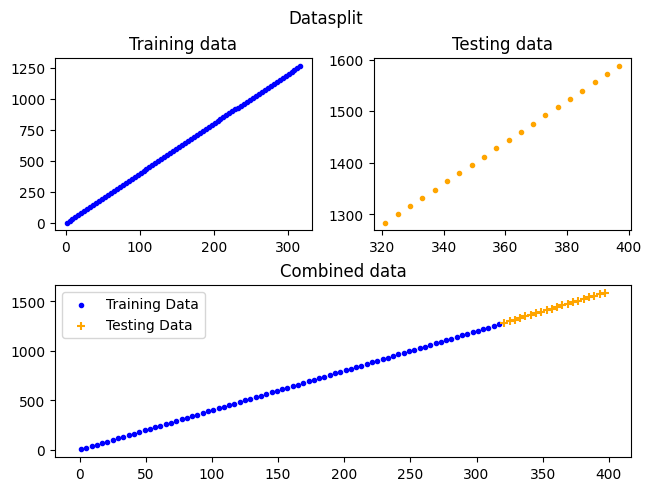

time: 855 ms (started: 2025-04-01 09:01:52 +00:00)


In [ ]:
plots.datasplit_plot(X_train, y_train, X_test, y_test)

## Machine Learning

### Regression with a Linear Regressor using scikit-learn

The scikit-learn API is very standardized. Thus, you could replace our current LinearRegression with any other Regressor (save the model specific hyperparameters), such as the KernelRidge regressor which we already imported earlier.  

#### Reshape the data
scikit-learn models need input data of shape (n_samples, n_features) and output data of either shape (n_sampels) or (n_samples, n_output). Currently our data is shaped:

In [ ]:
print(f'Shape of input: {X_train.shape}, shape of output: {y_train.shape}')

Shape of input: (80,), shape of output: (80,)
time: 1.36 ms (started: 2025-04-01 09:01:53 +00:00)


Since n_samples = 80 and n_features = n_outputs = 1, we just need to add one dimension to the input vector. The output vector we can leave as is.

In [ ]:
X_train_scikit = np.expand_dims(X_train, axis=-1)
#of course the same goes for the test data
X_test_scikit = np.expand_dims(X_test, axis=-1)

print(f'Shape of input: {X_train_scikit.shape}, shape of output: {y_train.shape}')
print(f'Before: {X_train[:5]}\nAfter: {X_train_scikit[:5]}')

Shape of input: (80, 1), shape of output: (80,)
Before: [ 1  5  9 13 17]
After: [[ 1]
 [ 5]
 [ 9]
 [13]
 [17]]
time: 2.77 ms (started: 2025-04-01 09:01:53 +00:00)


#### Create the Regressor

In [ ]:
linearRegressor = LinearRegression()

time: 534 µs (started: 2025-04-01 09:01:53 +00:00)


#### Fit the model

In [ ]:
%load_ext autotime
linearRegressor.fit(X=X_train_scikit, y=y_train)
print(f"coef: {linearRegressor.coef_}")
print()

coef: [4.]

time: 2.21 ms (started: 2025-04-01 09:02:50 +00:00)


In [ ]:
%unload_ext autotime

#### Test model on unseen data

In [ ]:
y_pred_linearRegression = linearRegressor.predict(X_test_scikit)

##### Look at the data

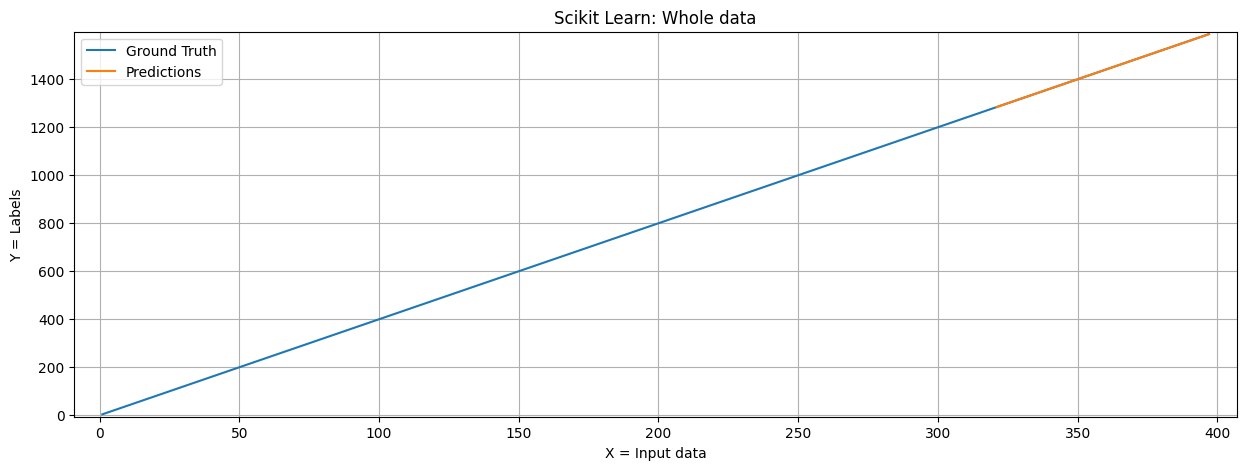

In [ ]:
plots.plot_whole_data_with_prediction(X, y, X_test, y_pred_linearRegression, title='Scikit Learn: Whole data')

So far, so easy. Now how to achieves this using tensorflow?

### Regression with one Dense (=Fully-Connected) Layer using TensofFlow.Keras

#### Build model
*   define structure
*   compile with optimizer and loss-function
*   look at summary



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,), name='InputLayer'),
    tf.keras.layers.Dense(units=1, name='DenseLayer')
])

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=.1),
    loss='mse')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ DenseLayer (Dense)                   │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

#### Train model with training data portion

In [ ]:
%load_ext autotime
history = model.fit(
    X_train,
    y_train,
    batch_size=10,
    epochs=10,
    #verbose=0,
    validation_split=0.1
    )
print()

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 507238.1250 - val_loss: 952227.3125
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 262987.8438 - val_loss: 561147.0000
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 154113.2031 - val_loss: 315968.9062
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 85234.0234 - val_loss: 159035.3281
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 41637.8555 - val_loss: 66367.8906
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 16570.6426 - val_loss: 20405.5059
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 4714.3359 - val_loss: 3786.9263
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 764.0339 - val_loss: 317.8293
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 50.4607 - val_loss: 13.4628
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 5.8665 - val_loss: 2.1366

time: 6.38 s (started: 2025-04-01 08:55:15 +00:00)


In [ ]:
%unload_ext autotime

### Look at Training

In [ ]:
hist = pd.DataFrame(history.history)
hist.index.name = 'epoch'
hist.tail()

,loss,val_loss
epoch,,
5,13859.128906,20405.505859
6,3719.757324,3786.926270
7,552.014221,317.829346
8,33.827347,13.462837
9,5.744107,2.136643


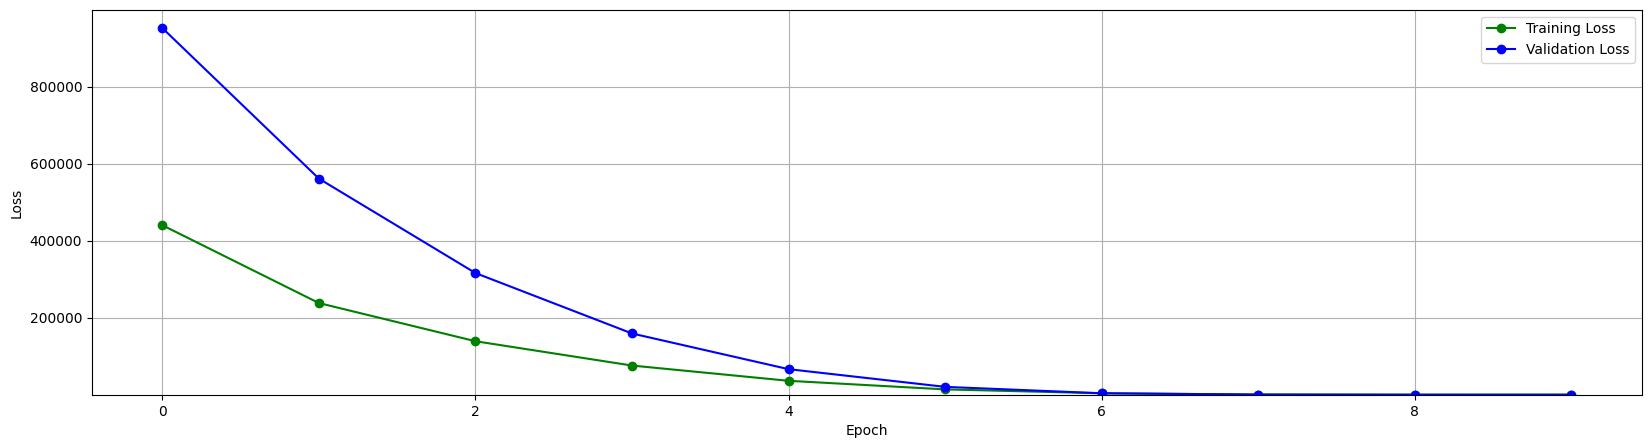

In [ ]:
plots.plot_loss(history)

### Test model on unseen test data

In [ ]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


#### Look at results

In [ ]:
y_pred[:2]

array([[1282.1842],
       [1298.1029]], dtype=float32)

In [ ]:
y_test[:2]

array([1284, 1300], dtype=int32)

In [ ]:
print(f"{y_pred.shape=} vs. {y_test.shape=}")

y_pred.shape=(20, 1) vs. y_test.shape=(20,)


In [ ]:
y_pred = y_pred.flatten() # alternative: y_pred.reshape(-1)
print(f"{y_pred.shape=}")

y_pred.shape=(20,)


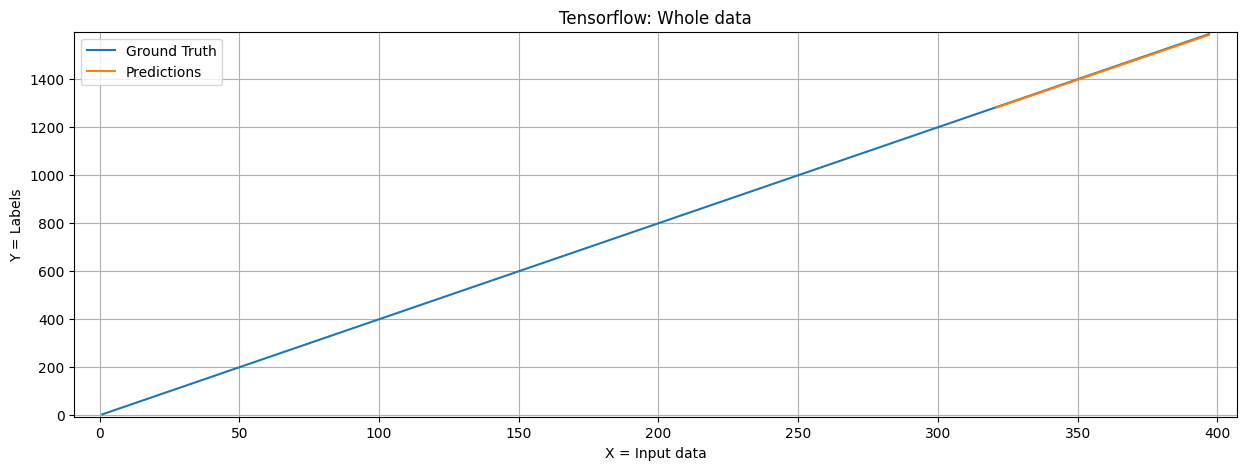

In [ ]:
plots.plot_whole_data_with_prediction(X, y, X_test, y_pred, title='Tensorflow: Whole data')


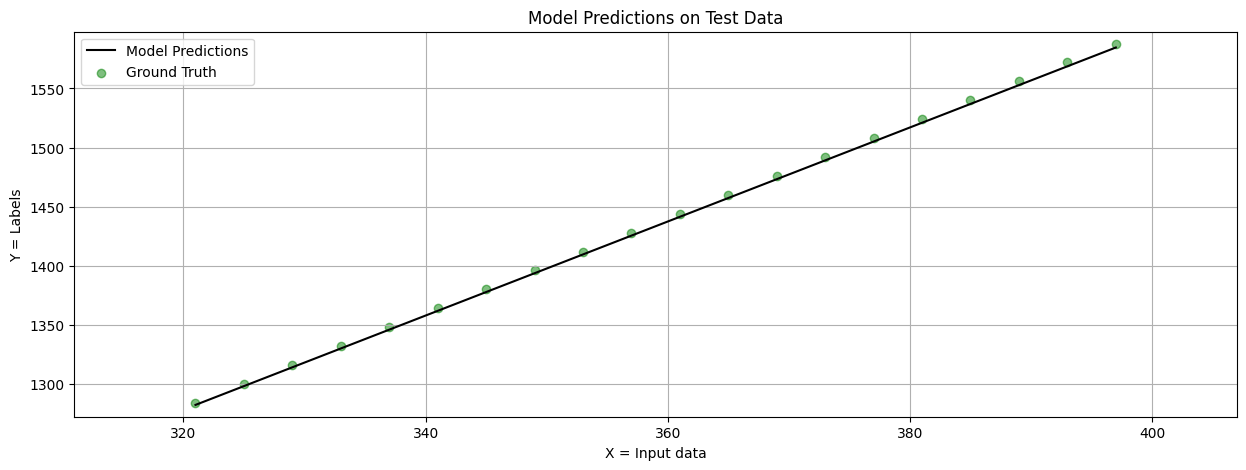

In [ ]:
plots.plot_data(X_test, y_test, y_pred, title='Model Predictions on Test Data')

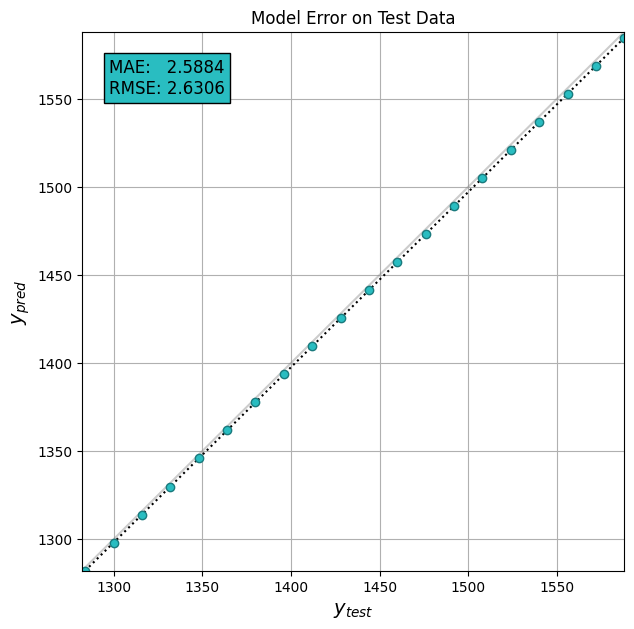

In [ ]:
plots.plot_error(y_test, y_pred, title='Model Error on Test Data')

### What happens if we train again?

In [ ]:
history = model.fit(
    X_train,
    y_train,
    batch_size=10,
    epochs=5,
    verbose=0,
    validation_split=0.1
    )

hist = pd.DataFrame(history.history)
hist.index.name = 'epoch'
hist.tail()

,loss,val_loss
epoch,,
0,5.685610,0.549501
1,5.659641,0.025383
2,5.621578,0.306348
3,5.563776,3.969630
4,14.805579,2250.348145


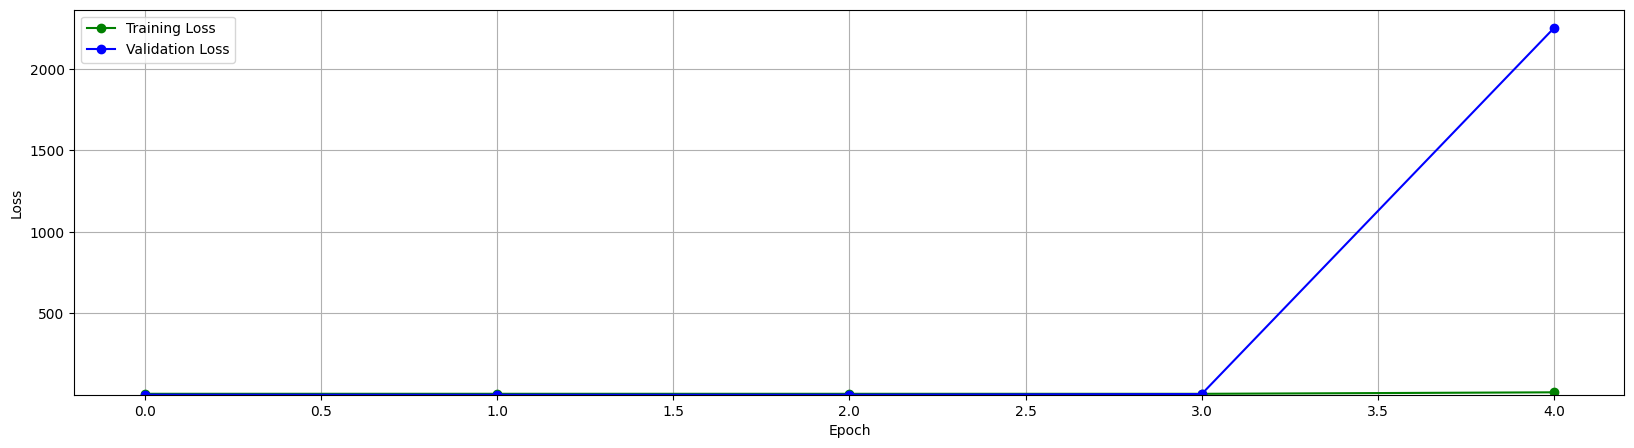

In [ ]:
plots.plot_loss(history)

In [ ]:
y_pred = model.predict(X_test).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


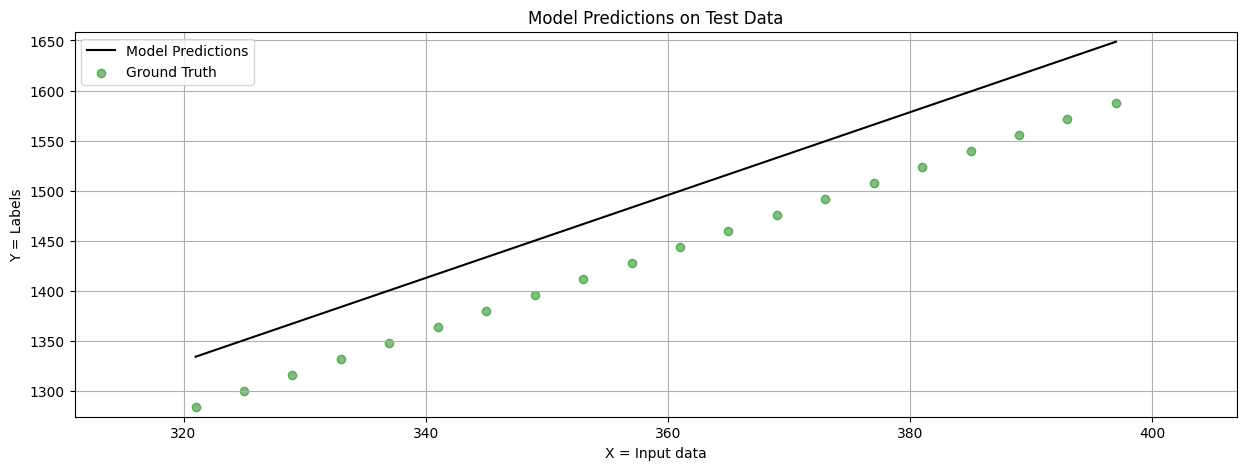

In [ ]:
plots.plot_data(X_test, y_test, y_pred, title='Model Predictions on Test Data')

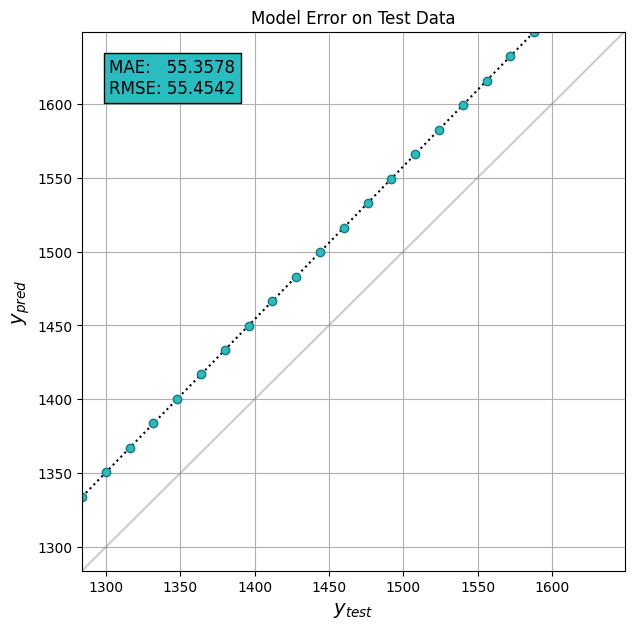

In [ ]:
plots.plot_error(y_test, y_pred, title='Model Error on Test Data')

❗So the model keeps its internal state as long as the runtime is alive and we dont reset the model (via tf.keras.backend.clear_session())❗

## Further Tests

### Data

In [ ]:
X = np.arange(1,400,4,dtype=np.int64)
y = np.asarray(list(map(lambda x: x**4, X)),dtype=np.int64)

X_train = X[:-test_size]
y_train = y[:-test_size]
X_test = X[-test_size:]
y_test = y[-test_size:]

print(f"X_train: {len(y_train)}, Y_train: {len(y_train)}")
print(f"X_test: {len(y_test)}, Y_test: {len(y_test)}")

X_train: 80, Y_train: 80
X_test: 20, Y_test: 20


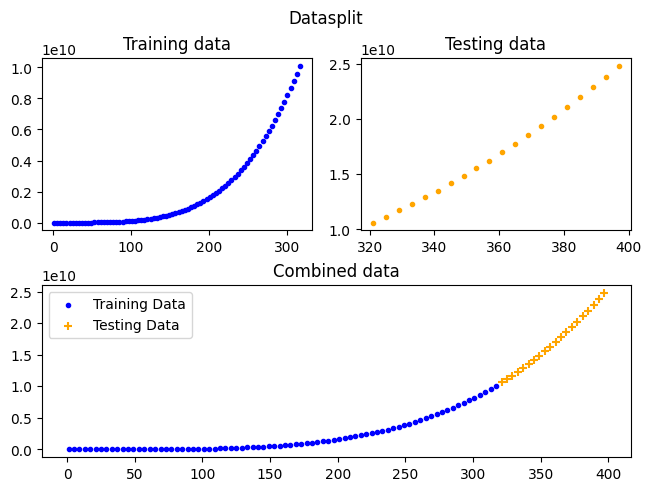

In [ ]:
plots.datasplit_plot(X_train, y_train, X_test, y_test)

In [ ]:
X_train_scikit = np.expand_dims(X_train, axis=-1)
X_test_scikit = np.expand_dims(X_test, axis=-1)

### Model

#### scikit-learn

In [ ]:
%load_ext autotime
linearRegressor = LinearRegression()
linearRegressor.fit(X=X_train_scikit, y=y_train)
print(f"coef: {linearRegressor.coef_}")
print()

coef: [25844114.39999999]

time: 22.8 ms (started: 2025-04-01 09:12:43 +00:00)


In [ ]:
%unload_ext autotime

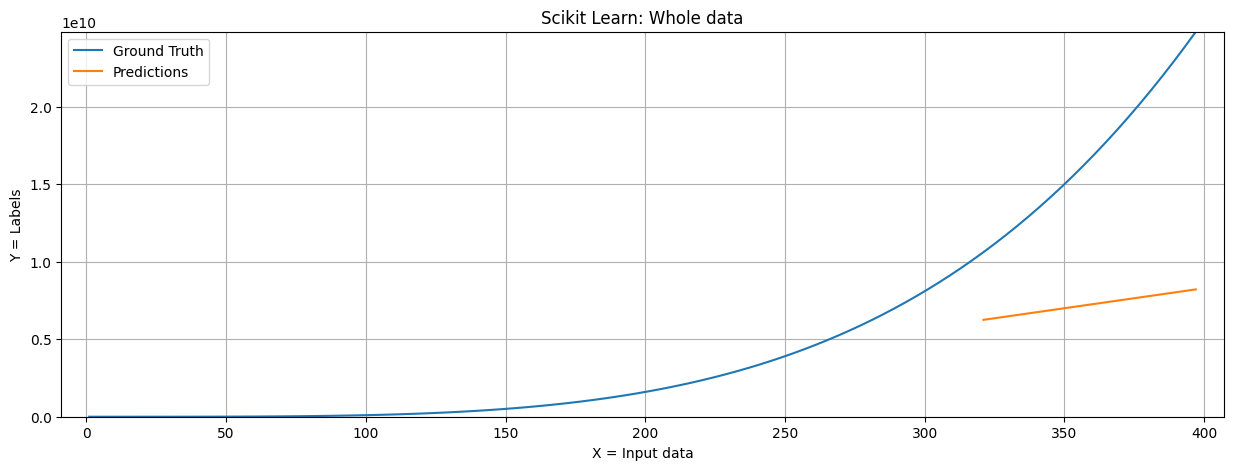

In [ ]:
y_pred_linearRegression = linearRegressor.predict(X_test_scikit)
plots.plot_whole_data_with_prediction(X, y, X_test, y_pred_linearRegression, title='Scikit Learn: Whole data')